In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import ode
import pandas as pd

from collections import defaultdict

plt.rcParams["figure.figsize"] = (12,8)

In [3]:
mC = 1.4830
muR = mC/2
alphaS = 0.5461
rC = 1E-15

In [12]:
def du(r, u, E):
    ruse = rC if r < rC else r
    return [u[1], -2*muR*(E + 4/3*alphaS/ruse)*(rC if r < rC else u[0])] 
    # return [u[1], -2*muR*(E*r + 4/3*alphaS) if r < rC else -2*muR*(E + 4/3*alphaS/r)*u[0]] 

In [5]:
def eigen(e0, step=0.0001, acc = 1E-5):
    sol = ode(du).set_integrator('vode')

    def f(E):
        sol.set_initial_value([0, 1], 0).set_f_params(E)
        cutoff = 100
        return abs(sol.integrate(cutoff)[0]*sp.exp(2*muR*E*cutoff))
    
    eig = e0
    inc = 1
    while abs(inc) > acc:
        inc = -f(eig)*step/(f(eig+step)-f(eig))
        eig += inc
        if eig >=0:
            return sp.NaN
    
    return eig

In [6]:
def findAll(reg):
    points = sp.arange(*reg, 0.001)
    eigs = defaultdict(list)
    for point in points:
        val = eigen(point)
        ind = "{:.2f}".format(float(val))
        eigs[ind].append(val)
        print(point, list(eigs.keys()))
    del eigs["nan"]
    return eigs

In [ ]:
eigs = findAll([-0.2,-0.006])

In [ ]:
def filterEigens(eigs, threshold=5):
    einums = list()
    for v in eigs.values():
        if len(v) > threshold:
            einum = sp.average(v)
            einums.append(einum)
    return sorted(einums)

In [ ]:
for i in eigens:
    print(i, eigens[0]/i)

In [17]:
def energPoints(reg, steps=1000, cutoff=100):
    sol = ode(du).set_integrator('dopri5', atol=0.0000001)

    def f(E):
        sol.set_initial_value([0, 1], 0).set_f_params(E)
        return abs(sol.integrate(cutoff)[0]*sp.exp(2*muR*E*cutoff))
    
    points = sp.arange(*reg, (reg[1]-reg[0])/steps)
    vals = [f(point) for point in points]
    return [points, vals]

In [20]:
reg = [-0.01, -0.001]
data = energPoints(reg, 1000, 1000)

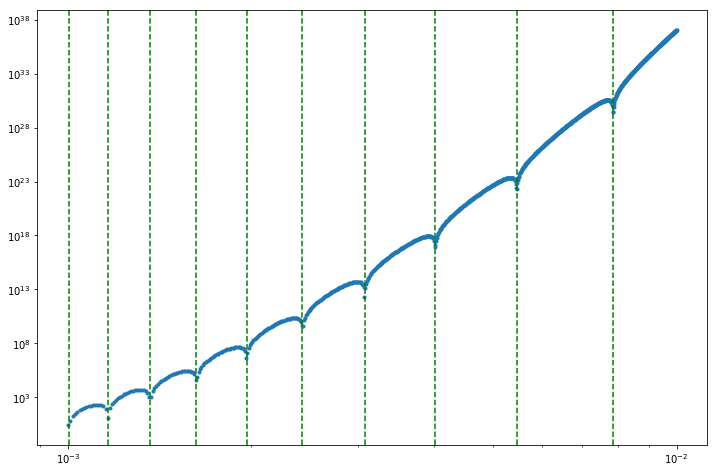

In [21]:
plt.plot(-data[0], data[1], linestyle="", marker=".")
plt.yscale("log")
plt.xscale("log")
# for eig in eigens:
#     if eig > reg[0] and eig < reg[1]:
#         plt.axvline(-eig, linestyle="", marker="o", color="gray")
for i in range(1,15):
    if -muR*alphaS**2*8/9/i**2 > reg[0] and -muR*alphaS**2*8/9/i**2 < reg[1]:
        plt.axvline(muR*alphaS**2*8/9/i**2, linestyle="--", color="green")

*Notice*

As higher energies one goes, as longer tails wave function has. At the same time, for low energies one will get huge magnitudes at high scales. That is why cutoff requires tuning along E axis.

In [18]:
reg = [-0.2, -0.01]
data = energPoints(reg, 1000, 100)

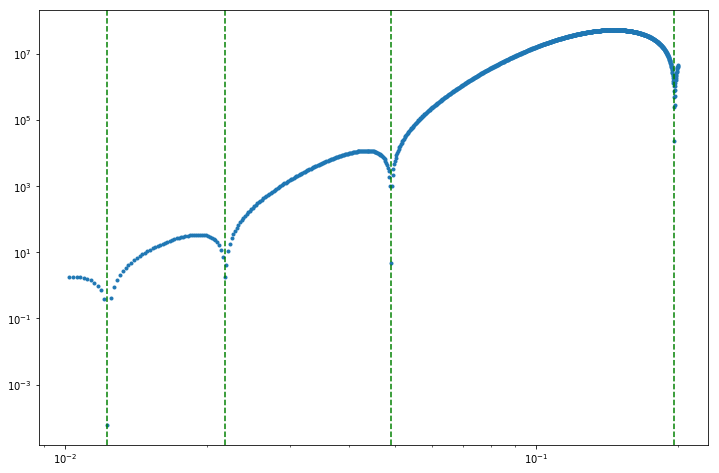

In [19]:
plt.plot(-data[0], data[1], linestyle="", marker=".")
plt.yscale("log")
plt.xscale("log")
for i in range(1,15):
    if -muR*alphaS**2*8/9/i**2 > reg[0] and -muR*alphaS**2*8/9/i**2 < reg[1]:
        plt.axvline(muR*alphaS**2*8/9/i**2, linestyle="--", color="green")

In [16]:
for i in range(1,15):
    print(muR*alphaS**2*8/9/i**2)

0.19656354952444446
0.049140887381111116
0.021840394391604942
0.012285221845277779
0.007862541980977779
0.0054600985979012355
0.004011501010702948
0.0030713054613194448
0.0024267104879561047
0.0019656354952444447
0.0016244921448301196
0.0013650246494753089
0.0011630979261801448
0.001002875252675737
